Persiapan

In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

Mengunduh Dataset

In [2]:
! chmod 600 /content/kaggle.json

In [3]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d sikhaok/rice-leaf-disease-onfield-5classes

100% 195M/195M [00:08<00:00, 38.3MB/s]
100% 195M/195M [00:08<00:00, 24.9MB/s]


In [4]:
#Mengekstrak gambar
zip_file = zipfile.ZipFile('/content/rice-leaf-disease-onfield-5classes.zip')
zip_file.extractall('/content/rice-leaf-disease')

In [5]:
base_dir = '/content/rice-leaf-disease/Onfield_riceleafpathology'
folder_train = '/content/rice-leaf-disease/Onfield_riceleafpathology/Train'
folder_validation = '/content/rice-leaf-disease/Onfield_riceleafpathology/Validation'

In [6]:
print(os.listdir(folder_train))
print(os.listdir(folder_validation))

['Tungro', 'LeafBlast', 'BrownSpot', 'Bacterialblight1', 'Healthy']
['Tungro', 'Bacterialblight', 'LeafBlast', 'BrownSpot', 'Healthy']


In [7]:
#Menghitung Jumlah pada Dataset
total_data = 0

# Iterasi semua file di dalam direktori
for root, dirs, files in os.walk(base_dir):
    total_data += len(files)

print("Jumlah total data:", total_data)

Jumlah total data: 2664


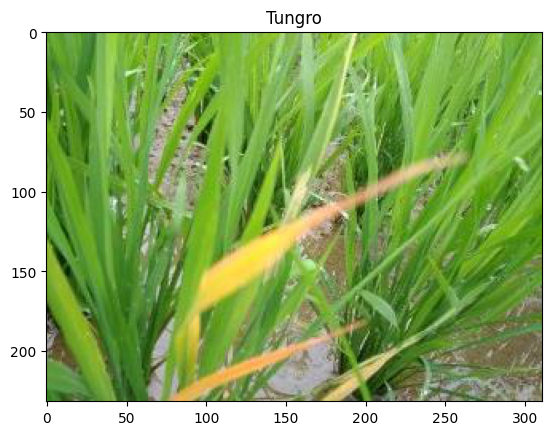

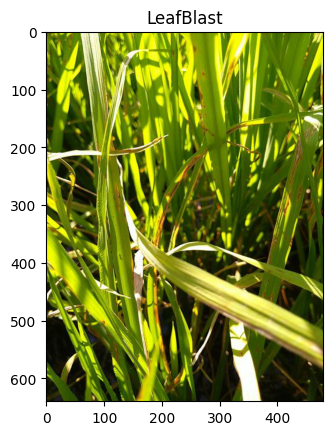

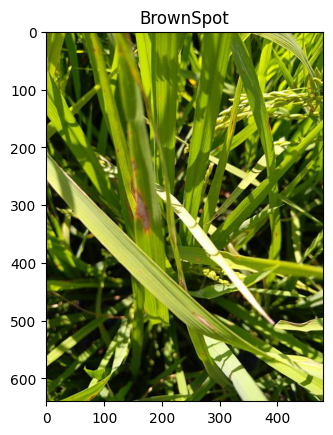

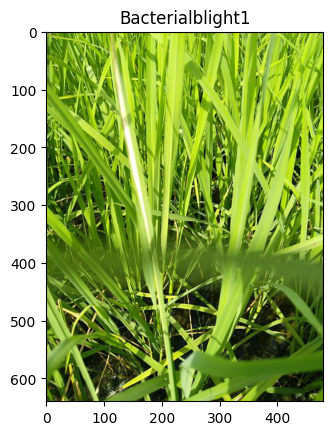

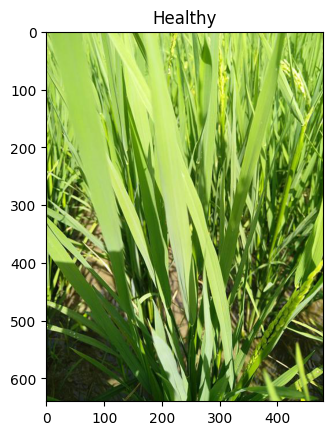

In [8]:
#Menampilkan gambar tiap kelas
for root, dirs, files in os.walk(folder_train):
    for dir_name in dirs:
        folder_path = os.path.join(root, dir_name)
        image_files = os.listdir(folder_path)
        if len(image_files) > 0:
            image_path = os.path.join(folder_path, image_files[0])
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(dir_name)
            plt.show()

DATA PREPARATION

In [9]:
IMAGE_SIZE = (250,250)
BATCH_SIZE = 32
SEED = 999

In [10]:
# Menggunakan ImageDataGenerator untuk preprocessing
imagegenerator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

In [11]:
# Image Data Generator pada Dataset
train_data = imagegenerator.flow_from_directory(
    folder_train,
    class_mode='categorical',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

validation_data = imagegenerator.flow_from_directory(
    folder_validation,
    class_mode='categorical',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

Found 1630 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


In [12]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

Model

Penyusunan Layer

In [13]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [14]:
#Melatih Model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data = validation_data
)

Epoch 1/20
51/51 [==============================] - 30s 342ms/step - loss: 1.4396 - accuracy: 0.4626 - val_loss: 1.6480 - val_accuracy: 0.1444
Epoch 2/20
51/51 [==============================] - 18s 354ms/step - loss: 1.2434 - accuracy: 0.5104 - val_loss: 1.7572 - val_accuracy: 0.3351
Epoch 3/20
51/51 [==============================] - 16s 321ms/step - loss: 1.1186 - accuracy: 0.5834 - val_loss: 1.8217 - val_accuracy: 0.3447
Epoch 4/20
51/51 [==============================] - 16s 317ms/step - loss: 0.9809 - accuracy: 0.6141 - val_loss: 1.7476 - val_accuracy: 0.3338
Epoch 5/20
51/51 [==============================] - 17s 334ms/step - loss: 0.8758 - accuracy: 0.6724 - val_loss: 1.9377 - val_accuracy: 0.3515
Epoch 6/20
51/51 [==============================] - 16s 319ms/step - loss: 0.8141 - accuracy: 0.7000 - val_loss: 1.6816 - val_accuracy: 0.4060
Epoch 7/20
51/51 [==============================] - 16s 317ms/step - loss: 0.7801 - accuracy: 0.7074 - val_loss: 1.7111 - val_accuracy: 0.4469

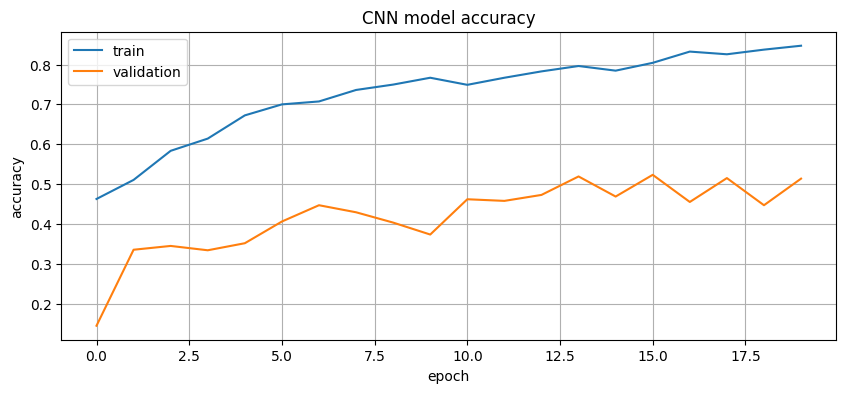

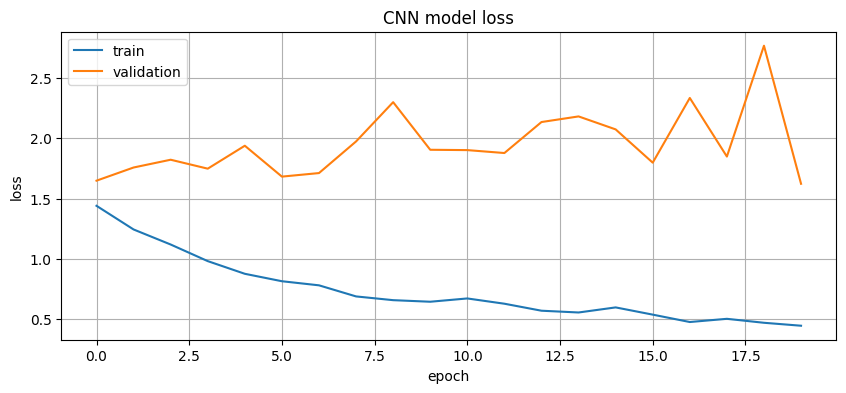

In [16]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

**Uji Coba**

In [17]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'Bacterialblight1': 0,
 'BrownSpot': 1,
 'Healthy': 2,
 'LeafBlast': 3,
 'Tungro': 4}

Saving lb.jpg to lb.jpg
1/1 [==============================] - 0s 21ms/step
lb.jpg
Tungro


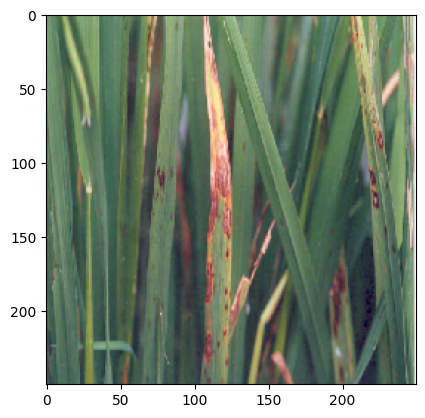

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # Memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = cnn_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)

  print(fn)
  if classes == 0:
    print('Bacterial Leaf Blight')
  elif classes == 1:
    print('Brown Spot')
  elif classes == 2:
    print('Healthy')
  elif classes == 3:
    print('Leaf Blast')  
  else:
    print('Tungro')


**Deployment**

HDF5

In [25]:
cnn_model.save('rice-leaf-disease-model.h5')